# Decision Tree

Saving test.csv to test (2).csv
Saving train.csv to train (2).csv


<ipython-input-14-cd351195bb3f>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_train['Age'].fillna(titanic_train['Age'].median(), inplace=True)
<ipython-input-14-cd351195bb3f>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

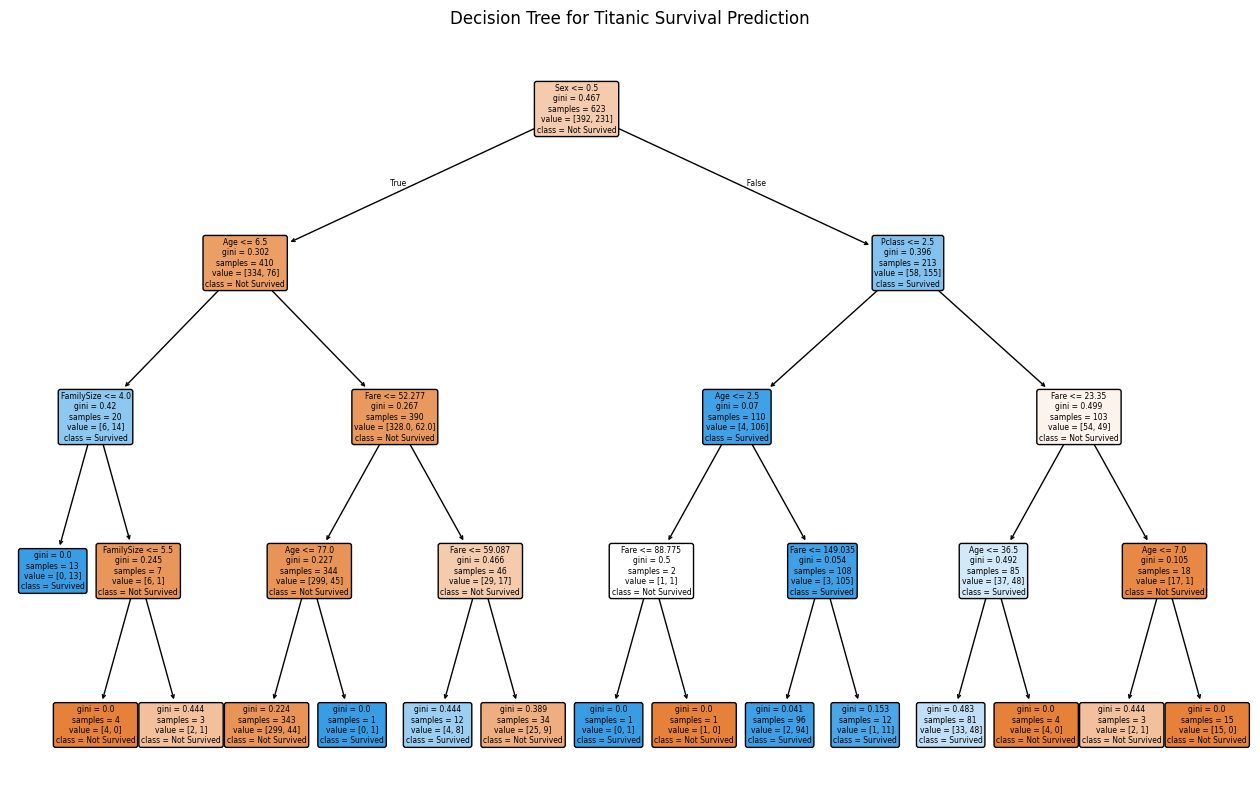

Model Accuracy: 0.82


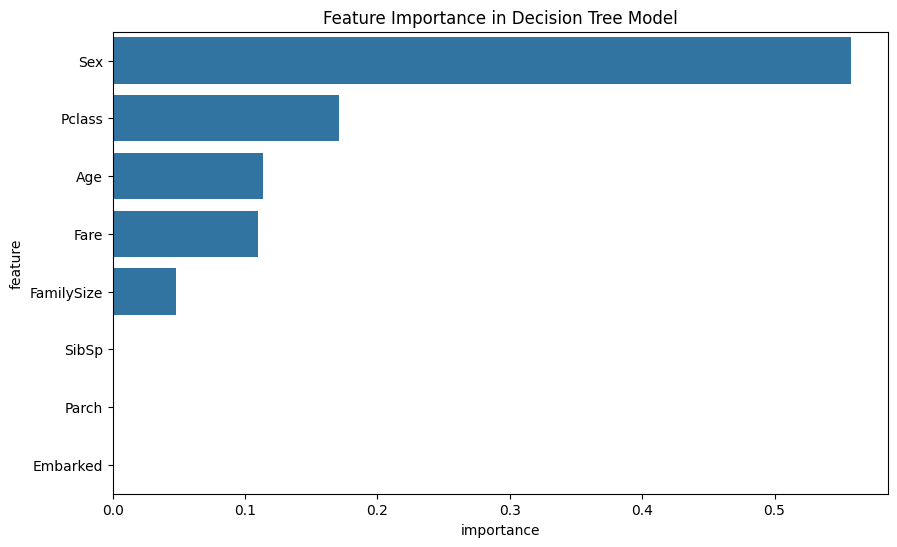

In [14]:
# Import necessary libraries
from google.colab import files
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Upload Titanic dataset files if not already in the environment
uploaded = files.upload()  # Uncomment if files need to be uploaded in Colab

# Load the Titanic training dataset
titanic_train = pd.read_csv('train.csv')

# Drop columns that won't be used
titanic_train = titanic_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Fill missing values
titanic_train['Age'].fillna(titanic_train['Age'].median(), inplace=True)
titanic_train['Embarked'].fillna(titanic_train['Embarked'].mode()[0], inplace=True)

# Convert categorical columns to numeric
titanic_train['Sex'] = titanic_train['Sex'].map({'male': 0, 'female': 1})
titanic_train['Embarked'] = titanic_train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Optional: Create a new feature 'FamilySize'
titanic_train['FamilySize'] = titanic_train['SibSp'] + titanic_train['Parch']

# Define features and target variable
X = titanic_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize']]
y = titanic_train['Survived']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the decision tree
tree_model = DecisionTreeClassifier(max_depth=4, criterion="gini", random_state=42)
tree_model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(16, 10))
plot_tree(tree_model,
          feature_names=X.columns,
          class_names=["Not Survived", "Survived"],
          filled=True,
          rounded=True)
plt.title("Decision Tree for Titanic Survival Prediction")
plt.show()

# Calculate and display model accuracy
from sklearn.metrics import accuracy_score
y_pred = tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Feature importance plot
importances = tree_model.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title("Feature Importance in Decision Tree Model")
plt.show()

# SHAP Analysis for interpretability
explainer = shap.TreeExplainer(tree_model)
shap_values = explainer.shap_values(X_test)





* Root Node (Top Node)

    Condition: Sex <= 0.5
        If Sex <= 0.5 (meaning the passenger is male), follow the left branch.
        If Sex > 0.5 (meaning the passenger is female), follow the right branch.
    Gini Impurity: 0.467 (indicating moderate impurity or mixed classes at this node).
    Samples: 623 passengers reached this point.
    Value: [392, 231] - 392 "Not Survived" and 231 "Survived."
    Class Prediction: Not Survived (more passengers in this node did not survive).

This root node suggests that gender (Sex) is an important feature in determining survival. Since males are more likely to "Not Survive," the tree splits first on Sex.

* Left Node

- Gini impurity: 0.302, indicating some mix but relatively pure.
- Samples: 410 passengers.
- Value: [334, 76] meaning 334 passengers did not survive, and 76 did.
- Class: Predicts Not Survived because the majority of samples are in that class.
- Split: If Age <= 6.5 is True, follow the left branch; if False, go right.

In [7]:
print(len(shap_values))        # Should print the number of classes (e.g., 2 for binary classification)
print(shap_values[0].shape)    # Print the shape of the SHAP values for the first class
print(shap_values[1].shape)    # Print the shape of the SHAP values for the second class


268
(8, 2)
(8, 2)


In [15]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=4a19e784e120fe146500b565341c307f053cfcc2136db1a7dd93b63bf69e6438
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [16]:
from lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(X_train.values, feature_names=X.columns, class_names=["Not Survived", "Survived"], mode='classification')
exp = explainer.explain_instance(X_test.iloc[0].values, tree_model.predict_proba)
exp.show_in_notebook()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


This LIME explanation chart shows the contribution of each feature in predicting whether this specific Titanic passenger would survive or not. Here’s what each part means:

1. **Prediction Probabilities (on the left)**:
   - The bar shows how likely the model thinks this passenger is to "Not Survive" (about 87%) versus "Survive" (about 13%).

2. **Feature Contributions**:
   - Each feature (like `Sex`, `Pclass`, `Fare`, etc.) is evaluated based on its impact on this prediction.
   - The blue bars (on the left) contribute to the "Not Survived" prediction, while the orange bars (on the right) contribute to the "Survived" prediction.

3. **Explanation of Top Features**:
   - **`Sex <= 0.00`** (or male): The passenger’s gender significantly contributes toward "Not Survived," with a strong impact (0.39) on pushing the prediction towards "Not Survived."
   - **`Pclass <= 3.00`** (3rd class): The passenger being in 3rd class also pushes the prediction towards "Not Survived," with a contribution of 0.21.
   - **`Fare <= 30.75`**: A lower fare also supports the "Not Survived" prediction with a smaller impact (0.05).

4. **Lesser Impact Features**:
   - Features like `Parch`, `Embarked`, and `FamilySize` have a minimal or zero impact on the prediction for this specific passenger, meaning they didn't strongly influence this prediction.
   - Parch:1.00 represents the number of parents or children the passenger had on board. This passenger had 1 parent or child with them
   - So, the orange color next to "Parch" suggests that having one parent or child onboard slightly increases this passenger’s likelihood of survival,

In summary, for this passenger:
- Being male, in 3rd class, and with a lower fare, are the strongest factors pushing the prediction toward "Not Survived."
- Features like `Parch` and `FamilySize` had little to no effect on this particular prediction.

This visualization helps identify the top reasons why the model predicted this passenger was more likely to "Not Survive."



### **Regression Techniques**
- **Linear Regression**: Predict fare based on other numeric features (e.g., age, class).
- **Logistic Regression**: Predict survival as a binary outcome using logistic regression.
- **Ridge and Lasso Regression**: Use Ridge and Lasso regression to see if regularization improves survival predictions by reducing feature weights.

---

### **Classification Algorithms**
- **Decision Trees**: Build a decision tree to classify passengers as survived or not based on features.
- **Random Forests**: Use an ensemble of decision trees to improve classification accuracy.
- **Naive Bayes**: Apply Naive Bayes to predict survival based on categorical features (e.g., Sex, Embarked).
- **Support Vector Machines**: Try SVM for classification and compare performance with other models.

---

### **Statistical Foundations**
- **Statistical Hypothesis Testing**: Test hypotheses like whether class affects survival rates.
  - **P-values**: Calculate p-values to understand the significance of features like age or fare in survival.
  - **Significance Levels**: Set thresholds (e.g., 0.05) to determine the significance of survival predictors.
  - **Confidence Intervals**: Calculate confidence intervals for survival predictions based on age, fare, etc.

---

### **Probability Distributions**
- **Normal Distribution**: Check if any features (e.g., age or fare) follow a normal distribution.
- **Binomial Distribution**: Model survival as a binomial distribution to explore probabilities of survival.
- **Variance and Standard Deviation**: Measure variance in survival rates across different classes or sexes.

---

### **Model Evaluation and Performance**
- **Model Evaluation Metrics**:
  - **Confusion Matrix**: Assess the model’s performance in predicting survival vs. non-survival.
  - **Precision, Recall, F1 Score**: Calculate these metrics for survival prediction to understand model quality.
  - **ROC Curve and AUC**: Evaluate binary classification performance for survival predictions.
  
- **Overfitting and Underfitting**
  - **Causes**: Investigate if the model overfits by looking at accuracy on training vs. test data.
  - **Mitigation Techniques**: Apply techniques like cross-validation and hyperparameter tuning to control overfitting.
  - **Regularization Methods**: Use Ridge or Lasso regression for regularization to avoid overfitting.

---

### **Data Preprocessing**
- **Handling Missing Data**:
  - **Imputation Techniques**: Fill missing age values using mean, median, or model-based methods.
  - **Strategies for Different Data Types**: Apply imputation differently for categorical (e.g., embarked) vs. numeric (e.g., age) data.
  
- **Feature Selection**:
  - **Correlation Analysis**: Check correlations between features and survival to decide which features to keep.
  - **Recursive Feature Elimination**: Use this method to select the most significant predictors of survival.
  - **Dimensionality Reduction Techniques**: Apply PCA to reduce features and visualize data in 2D.

---

### **Programming and Technical Skills**
- **Python and SQL Proficiency**:
  - **Data Manipulation**: Perform data cleaning and transformation using Pandas.
  - **Basic Algorithmic Problem-Solving**: Implement basic algorithms to predict survival.
  - **Query Optimization**: Store data in SQL and optimize queries to analyze passenger statistics efficiently.

---

### **Advanced Topics**
- **Ensemble Methods**:
  - **Bagging**: Use bagging with decision trees to improve survival prediction.
  - **Boosting**: Apply boosting algorithms like AdaBoost or XGBoost on the Titanic dataset for better accuracy.
  - **Stacking**: Use stacking to combine different classifiers and improve performance.

- **Cross-Validation Techniques**:
  - **K-fold Cross-Validation**: Use k-fold cross-validation to improve model reliability.
  - **Stratified Sampling**: Ensure that each fold has a similar survival rate by using stratified sampling.

---

### **Practical Application**
- **A/B Testing**:
  - **Experimental Design**: Set up experiments, for example, testing the influence of ticket class on survival rates.
  - **Interpreting Results**: Interpret results to make insights on passenger demographics and survival rates.

- **Machine Learning Model Deployment**:
  - **Model Maintenance**: Create a model pipeline and update with new data to maintain accuracy.
  - **Performance Monitoring**: Monitor model performance over time, especially if deployed in an application.

Each of these methods allows you to explore different facets of the Titanic dataset and gain deeper insights into passenger survival factors.

# K-MEAN CLUSTERING

<ipython-input-11-06175c9f7d85>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
<ipython-input-11-06175c9f7d85>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

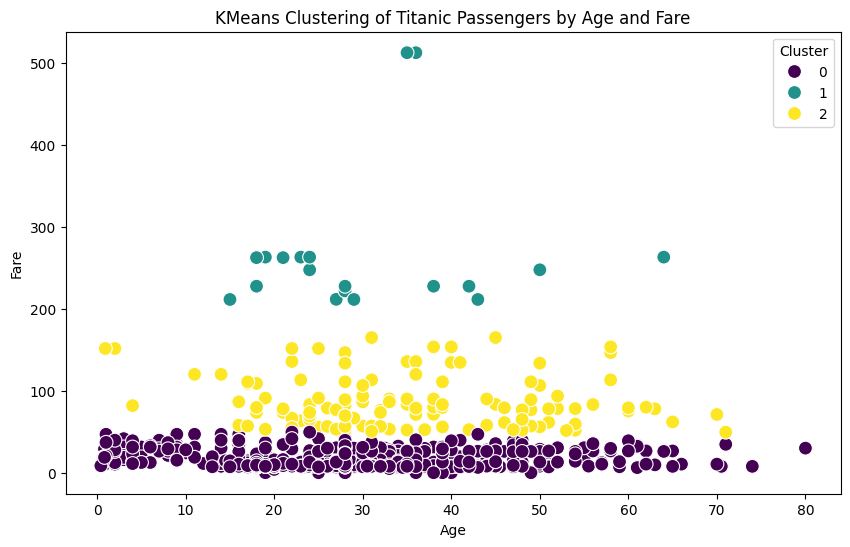

In [11]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
titanic = pd.read_csv('train.csv')

# Preprocess the data
# Dropping columns that won't be used
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Fill missing values for Age and Embarked
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

# Convert categorical columns to numeric
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic['Embarked'] = titanic['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Select features for clustering
X_clustering = titanic[['Age', 'Fare']]

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
titanic['Cluster'] = kmeans.fit_predict(X_clustering)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=titanic, x='Age', y='Fare', hue='Cluster', palette='viridis', s=100)
plt.title("KMeans Clustering of Titanic Passengers by Age and Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Cluster")
plt.show()


In [12]:
# Print cluster centers
print(kmeans.cluster_centers_)


[[ 28.27880658  15.45395432]
 [ 30.85       279.308545  ]
 [ 34.71070423  83.39327958]]


These are the centroids for each of the 3 clusters, representing the average "profile" for each group:

- Cluster 0: Average Age ≈ 28.28, Average Fare ≈ 15.45
- Cluster 1: Average Age ≈ 30.85, Average Fare ≈ 279.31
- Cluster 2: Average Age ≈ 34.71, Average Fare ≈ 83.39


In [13]:
# Count the number of passengers in each cluster
print(titanic['Cluster'].value_counts())


Cluster
0    729
2    142
1     20
Name: count, dtype: int64


In [14]:
# Group by cluster and get descriptive statistics
cluster_summary = titanic.groupby('Cluster')[['Age', 'Fare']].describe()
print(cluster_summary)


           Age                                                         Fare  \
         count       mean        std    min    25%   50%   75%   max  count   
Cluster                                                                       
0        729.0  28.278807  12.665767   0.42  22.00  28.0  33.0  80.0  729.0   
1         20.0  30.850000  12.265806  15.00  22.50  28.0  36.5  64.0   20.0   
2        142.0  34.710704  13.646646   0.92  26.25  31.5  45.0  71.0  142.0   

                                                                          \
               mean         std       min        25%       50%       75%   
Cluster                                                                    
0         15.453954   10.024083    0.0000    7.87920   11.1333   23.4500   
1        279.308545  102.353391  211.3375  226.08855  247.5208  263.0000   
2         83.393280   30.102272   49.5042   57.00000   77.2875   91.0792   

                   
              max  
Cluster            
0       

- Cluster 0: Younger, budget-friendly group, most passengers paid lower fares.
- Cluster 1: Likely first-class or luxury passengers with very high fares.
- Cluster 2: Slightly older passengers with moderate fares, possibly in second-class.


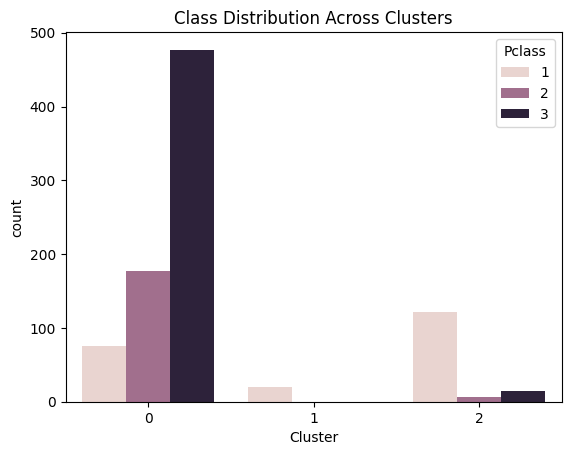

In [15]:
# Example: Distribution of Pclass within each cluster
sns.countplot(data=titanic, x='Cluster', hue='Pclass')
plt.title("Class Distribution Across Clusters")
plt.show()


## Practical Implementation Summary

### Decision Tree (Supervised)

- **Used LIME** to interpret the model’s predictions for individual passengers.
- **Key Findings**:
  - **Sex**, **Pclass**, and **Fare** are the most influential features.
- **Example Interpretation**:
  - A male passenger in third class with a lower fare is more likely to be predicted as "Not Survived".
  - The LIME chart shows feature contributions, with **Sex**, **Pclass**, and **Fare** as key determinants.

### K-means Clustering (Unsupervised)

- **Grouped passengers** into clusters based on **Age** and **Fare** (later adding **Pclass** for more refined clusters).
- **Identified Clusters**:
  - **Cluster 0**: Younger passengers with lower fares, likely of lower socioeconomic status.
  - **Cluster 1**: Passengers with high fares, likely in first class, representing wealthier individuals.
  - **Cluster 2**: Older passengers with mid-range fares, likely in second class or slightly better socioeconomic conditions.
- **Insights**:
  - This approach helped understand **demographic segments** within the passengers but didn't provide direct insights into survival.

---

This summary highlights the strengths of each approach, with the **Decision Tree** providing insights into survival factors and **K-means** revealing passenger profiles.


# Linear Regression

## Purpose of Linear Regression on the Titanic Dataset

### 1. Predicting Fare
   - Use features like **Age**, **Pclass**, and **Embarked** to predict the fare a passenger might have paid.
   - Though not directly tied to survival, it helps reveal socioeconomic patterns.

### 2. Understanding Relationships
   - Regression highlights how fare varies by features, like showing **Pclass** as a strong predictor of fare.

### 3. Exploring Socioeconomic Profiles
   - Higher fares generally indicate wealthier passengers, often in **Pclass 1**.
   - This can reveal the socioeconomic divide on the Titanic, aiding in understanding survival patterns.

### 4. Supporting Feature Selection
   - Insights from fare prediction can guide which features to use in survival models, helping refine feature importance.




In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [20]:
# Load Titanic dataset
titanic = pd.read_csv('train.csv')

# Select relevant numeric features and target variable
titanic = titanic[['Fare', 'Age', 'Pclass']]

# Handle missing values
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)


<ipython-input-20-7d971d93ab32>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)


In [21]:
# Features (X) and target (y)
X = titanic[['Age', 'Pclass']]
y = titanic['Fare']


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [24]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [25]:
# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1051.4749856300004
R-squared: 0.3205022235412075




- **Mean Squared Error (MSE)**: `1051.47`
   - The high MSE indicates a significant difference between predicted and actual fare values, suggesting considerable prediction error.

- **R-squared (R²)**: `0.32`
   - Only 32% of the variance in fare is explained by **Age** and **Pclass**, showing that these two features alone are insufficient for accurate fare prediction.

## Target Thresholds for Fare Prediction  (MSE < 500, R² ≥ 0.7)

The low R² value suggests that **Age** and **Pclass** do not fully capture fare variability. Other features likely influence fare, such as:

- **Embarked**: Different departure ports may correspond to varied fare costs.
- **Family Size**: Traveling alone vs. with family could affect ticket costs.
- **Cabin Location**: Proximity to amenities might influence fare prices.

### Next Steps to Improve the Model (Since linear bad performed. Do non-linear)
1. **Add More Features**: Consider including **Embarked** and **FamilySize** to capture more fare-related factors.
2. **Use Polynomial Features**: To account for non-linear relationships between fare and predictors.
3. **Feature Engineering**: Derive new features to capture complex relationships in the data.



In [28]:
# Load Titanic dataset again to ensure all columns are included
titanic = pd.read_csv('train.csv')

# Check column names to confirm all necessary columns are loaded
print(titanic.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


# Add More Features (Calculate Family Size,Encode Embarked)

In [29]:
# Add FamilySize feature
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']

# Encode Embarked feature as numerical
titanic['Embarked'] = titanic['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Update features and target
X = titanic[['Age', 'Pclass', 'Embarked', 'FamilySize']]
y = titanic['Fare'] #becuase we want to predict fare


In [30]:
# Check the columns in the Titanic dataset
print(titanic.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize'],
      dtype='object')


# Add Polynomial Features to capture potential non-linear relationships in the data.

In [32]:
# Fill missing values
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)


<ipython-input-32-0c95793a8ec9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
<ipython-input-32-0c95793a8ec9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [33]:
from sklearn.preprocessing import PolynomialFeatures

# Define polynomial feature transformation with degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)

# Transform the features
X_poly = poly.fit_transform(titanic[['Age', 'Pclass', 'Embarked', 'FamilySize']])

# Convert transformed features into a DataFrame for easier handling
X_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(['Age', 'Pclass', 'Embarked', 'FamilySize']))

# Set the target variable
y = titanic['Fare']


### Explanation of the Code Steps


- **Defining Polynomial Transformation**:
  - degree=2: This means it will create squared terms (e.g., Age²) and pairwise interaction terms (e.g., Age × Pclass) for the specified features.

  - include_bias=False: This prevents adding an extra column of 1s (which represents the intercept); we don’t need this because our model will handle it.

- **Applying Polynomial Transformation**:
  - We select the columns ['Age', 'Pclass', 'Embarked', 'FamilySize'] from the Titanic dataset.

  - fit_transform applies the polynomial transformation, It generates new features, including the original features, squared terms (like Age²), and interaction terms (like Age × Pclass).

- **Converting to DataFrame**:
  - This converts X_poly to a DataFrame for easier handling.
  - poly.get_feature_names_out() generates column names, labeling each polynomial and interaction term (e.g., Age², Pclass × FamilySize).



In [34]:
# Display the first few rows of the transformed DataFrame
print(X_poly.head())


    Age  Pclass  Embarked  FamilySize   Age^2  Age Pclass  Age Embarked  \
0  22.0     3.0       0.0         1.0   484.0        66.0           0.0   
1  38.0     1.0       1.0         1.0  1444.0        38.0          38.0   
2  26.0     3.0       0.0         0.0   676.0        78.0           0.0   
3  35.0     1.0       0.0         1.0  1225.0        35.0           0.0   
4  35.0     3.0       0.0         0.0  1225.0       105.0           0.0   

   Age FamilySize  Pclass^2  Pclass Embarked  Pclass FamilySize  Embarked^2  \
0            22.0       9.0              0.0                3.0         0.0   
1            38.0       1.0              1.0                1.0         1.0   
2             0.0       9.0              0.0                0.0         0.0   
3            35.0       1.0              0.0                1.0         0.0   
4             0.0       9.0              0.0                0.0         0.0   

   Embarked FamilySize  FamilySize^2  
0                  0.0           1.

In [35]:
# Print the shape of the transformed data
print("Shape of X_poly:", X_poly.shape)


Shape of X_poly: (891, 14)


In [36]:
# Display the column names
print("Columns in X_poly:", X_poly.columns.tolist())


Columns in X_poly: ['Age', 'Pclass', 'Embarked', 'FamilySize', 'Age^2', 'Age Pclass', 'Age Embarked', 'Age FamilySize', 'Pclass^2', 'Pclass Embarked', 'Pclass FamilySize', 'Embarked^2', 'Embarked FamilySize', 'FamilySize^2']


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [39]:
# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [40]:
# Predict fare on the test set
y_pred = model.predict(X_test)


In [41]:
# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 840.6558893277513
R-squared (R²): 0.45674046898705634


# Visualize Coefficients to understanding relationships with fare

In [42]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [43]:
# Display the coefficients with their corresponding feature names
coefficients = pd.DataFrame({'Feature': X_poly.columns, 'Coefficient': model.coef_})
print(coefficients)


                Feature  Coefficient
0                   Age     0.152677
1                Pclass  -140.915335
2              Embarked    70.640036
3            FamilySize    41.130658
4                 Age^2    -0.010157
5            Age Pclass     0.237725
6          Age Embarked    -0.310746
7        Age FamilySize    -0.087273
8              Pclass^2    27.634707
9       Pclass Embarked   -18.186281
10    Pclass FamilySize   -12.833002
11           Embarked^2    -4.498299
12  Embarked FamilySize    -1.820467
13         FamilySize^2     0.623793


# In better order

In [44]:
# Sort coefficients by absolute value in descending order
coefficients['Absolute Coefficient'] = coefficients['Coefficient'].abs()
sorted_coefficients = coefficients.sort_values(by='Absolute Coefficient', ascending=False)
sorted_coefficients = sorted_coefficients[['Feature', 'Coefficient']]  # Drop the extra column for display

# Display sorted coefficients
print(sorted_coefficients)


                Feature  Coefficient
1                Pclass  -140.915335
2              Embarked    70.640036
3            FamilySize    41.130658
8              Pclass^2    27.634707
9       Pclass Embarked   -18.186281
10    Pclass FamilySize   -12.833002
11           Embarked^2    -4.498299
12  Embarked FamilySize    -1.820467
13         FamilySize^2     0.623793
6          Age Embarked    -0.310746
5            Age Pclass     0.237725
0                   Age     0.152677
7        Age FamilySize    -0.087273
4                 Age^2    -0.010157


# Visualize coefficient in Bar Horizontal

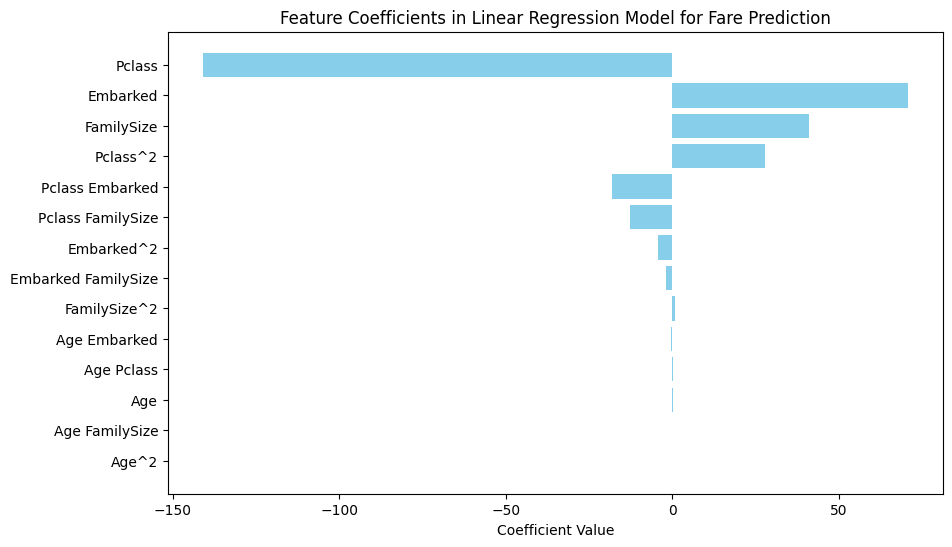

In [45]:
import matplotlib.pyplot as plt

# Plot sorted coefficients
plt.figure(figsize=(10, 6))
plt.barh(sorted_coefficients['Feature'], sorted_coefficients['Coefficient'], color='skyblue')
plt.xlabel("Coefficient Value")
plt.title("Feature Coefficients in Linear Regression Model for Fare Prediction")
plt.gca().invert_yaxis()  # Invert y-axis to have the largest coefficients at the top
plt.show()


### Next Steps to Improve the Model

Here are some advanced steps you can take to improve the model’s performance:

1. **Add More Features**:
    - **Cabin**: If there’s a way to extract information from the **Cabin** feature (like deck or location), it may help capture fare variations.
    - Example: Two passengers in Pclass 1 might pay different fares if one is on a premium deck (like Deck A) with better amenities, while another is on a lower deck (like Deck C) with less desirable accommodations. By extracting Deck from Cabin, we capture within-class differences in fare based on location and amenities. This can give the model more nuance, especially for first-class passengers who may have varied fares due to different cabin locations

    - **Title**: Extract passenger titles (e.g., Mr., Mrs., Miss) from the **Name** column, which may be a proxy for socioeconomic status.
    - Passengers with higher status titles (e.g., “Lady” or “Countess”) might pay more, regardless of where they embarked

    - **Family Size Interaction**: Try additional interactions with **FamilySize** to capture potential discounts for families or groups.
    
2. **Feature Engineering with Log Transformations**:
    - Since fare distributions often have outliers, consider applying a **log transformation** to **Fare** to reduce the effect of extreme values.
    - You could also apply log transformations to other skewed features if necessary.

# Extract deck from cabin (e.g., "C85" -> "C").

In [46]:
# Extract deck from the Cabin column
titanic['Deck'] = titanic['Cabin'].str[0]  # We’ll take the first letter from each cabin entry, assuming it represents the deck level (e.g., "C85" -> "C").


In [47]:
# Fill missing Deck values
titanic['Deck'].fillna('Unknown', inplace=True)
#Since some Cabin values may be missing, let’s fill missing Deck values with "Unknown" or another placeholder.


<ipython-input-47-ff4f27bbf510>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Deck'].fillna('Unknown', inplace=True)


In [48]:
# Encode Deck as a categorical variable
titanic['Deck'] = titanic['Deck'].astype('category').cat.codes


# Use a regular expression to capture titles from names (e.g., “Mr.”, “Mrs.”, “Miss.”).

In [49]:
# Extract title from the Name column
titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


# Map Rare Titles

Some titles may appear only a few times (e.g., "Countess", "Lady"). We can map these rare titles to more general categories (e.g., "Noble") or group them under "Other".



In [50]:
# Simplify titles into broader categories
title_mapping = {
    "Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs", "Countess": "Noble", "Lady": "Noble", "Sir": "Noble",
    "Capt": "Officer", "Col": "Officer", "Major": "Officer", "Dr": "Officer", "Rev": "Officer",
    "Jonkheer": "Noble", "Don": "Noble"
}
titanic['Title'] = titanic['Title'].replace(title_mapping)


# Convert Title to Categorical Codes

In [51]:
# Encode Title as a categorical variable
titanic['Title'] = titanic['Title'].astype('category').cat.codes


# Let’s check that the Deck and Title features were added successfully

In [52]:
# Display the first few rows to verify Deck and Title
print(titanic[['Name', 'Cabin', 'Deck', 'Title']].head())


                                                Name Cabin  Deck  Title
0                            Braund, Mr. Owen Harris   NaN     8      2
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   C85     2      3
2                             Heikkinen, Miss. Laina   NaN     8      1
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  C123     2      3
4                           Allen, Mr. William Henry   NaN     8      2


# Include the New Features in the Model

In [53]:
# Update feature set with Deck and Title
X = titanic[['Age', 'Pclass', 'Embarked', 'FamilySize', 'Deck', 'Title']]

# Set the target variable
y = titanic['Fare']


In [54]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [56]:
# Predict fare on the test set
y_pred = model.predict(X_test)


In [57]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 847.0074358011418
R-squared (R²): 0.4526358904048491


# Log Transformation on Fare np.log1p()

In [58]:
import numpy as np

# Apply log transformation to Fare
titanic['Fare_log'] = np.log1p(titanic['Fare'])  # log1p handles zero values gracefully

# Set the new target variable as the log-transformed Fare
y_log = titanic['Fare_log']


In [59]:
# Split the data into training and testing sets
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)


In [60]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data with log-transformed fare
model.fit(X_train, y_train_log)


LinearRegression()

In [61]:
# Predict the log-transformed fare on the test set
y_pred_log = model.predict(X_test)

# Calculate MSE and R² using the log-transformed fare
mse_log = mean_squared_error(y_test_log, y_pred_log)
r2_log = r2_score(y_test_log, y_pred_log)

print("Mean Squared Error (MSE) with log-transformed Fare:", mse_log)
print("R-squared (R²) with log-transformed Fare:", r2_log)


Mean Squared Error (MSE) with log-transformed Fare: 0.271558132361055
R-squared (R²) with log-transformed Fare: 0.6790003957073368


MSE < 500:
R² ≥ 0.7:
were target thresholds

These results show a significant improvement with the log transformation applied to Fare:



titanic['Fare_log'] = np.log1p(titanic['Fare'])


Fare_log=ln(Fare+1)



*  Reduce the Impact of Outlier (High fares (for luxury or first-class tickets) are "compressed" or shrunk down, so they don’t skew the model as much)

*  Handle Zero Values Smoothly (Adding +1 before taking the log ensures that The transformation shifts everything up by 1, so zeros turn into a small positive value instead of causing an error)

*  Make Relationships Easier to Capture (smaller values are kept relatively unchanged, while larger values are scaled down.This creates a more uniform distribution for Fare, making patterns clearer and easier for the model to learn)




# Steps to Identify Outliers

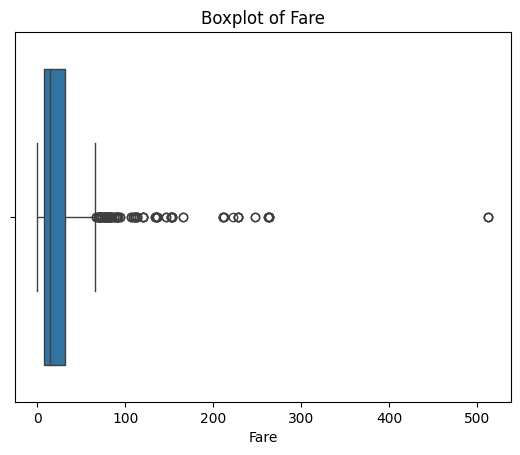

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for Fare
sns.boxplot(data=titanic, x='Fare')
plt.title("Boxplot of Fare")
plt.show()


In [63]:
from scipy import stats

# Calculate z-scores for Fare
titanic['Fare_zscore'] = stats.zscore(titanic['Fare'])
outliers_fare = titanic[(titanic['Fare_zscore'] > 3) | (titanic['Fare_zscore'] < -3)]


In [65]:
# Display the identified outliers
print(outliers_fare[['Fare', 'Fare_zscore']])


         Fare  Fare_zscore
27   263.0000     4.647001
88   263.0000     4.647001
118  247.5208     4.335332
258  512.3292     9.667167
299  247.5208     4.335332
311  262.3750     4.634417
341  263.0000     4.647001
377  211.5000     3.610065
380  227.5250     3.932723
438  263.0000     4.647001
527  221.7792     3.817033
557  227.5250     3.932723
679  512.3292     9.667167
689  211.3375     3.606793
700  227.5250     3.932723
716  227.5250     3.932723
730  211.3375     3.606793
737  512.3292     9.667167
742  262.3750     4.634417
779  211.3375     3.606793


In [66]:
# Sort the outliers by Fare in descending order
sorted_outliers = outliers_fare[['Fare', 'Fare_zscore']].sort_values(by='Fare', ascending=False)
print(sorted_outliers)


         Fare  Fare_zscore
258  512.3292     9.667167
737  512.3292     9.667167
679  512.3292     9.667167
27   263.0000     4.647001
341  263.0000     4.647001
88   263.0000     4.647001
438  263.0000     4.647001
311  262.3750     4.634417
742  262.3750     4.634417
118  247.5208     4.335332
299  247.5208     4.335332
557  227.5250     3.932723
716  227.5250     3.932723
700  227.5250     3.932723
380  227.5250     3.932723
527  221.7792     3.817033
377  211.5000     3.610065
689  211.3375     3.606793
730  211.3375     3.606793
779  211.3375     3.606793


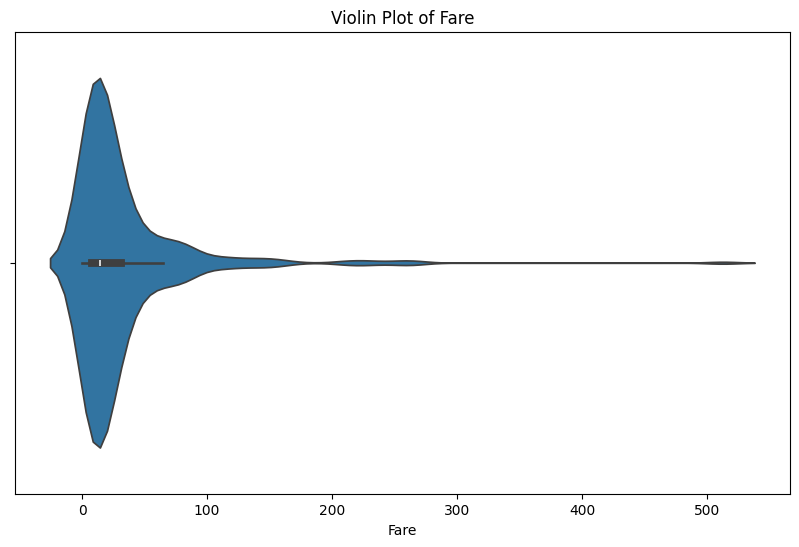

In [69]:
# Violin plot for Fare
plt.figure(figsize=(10, 6))
sns.violinplot(data=titanic, x='Fare')
plt.title("Violin Plot of Fare")
plt.show()


# Handling Outliers by capping at 300

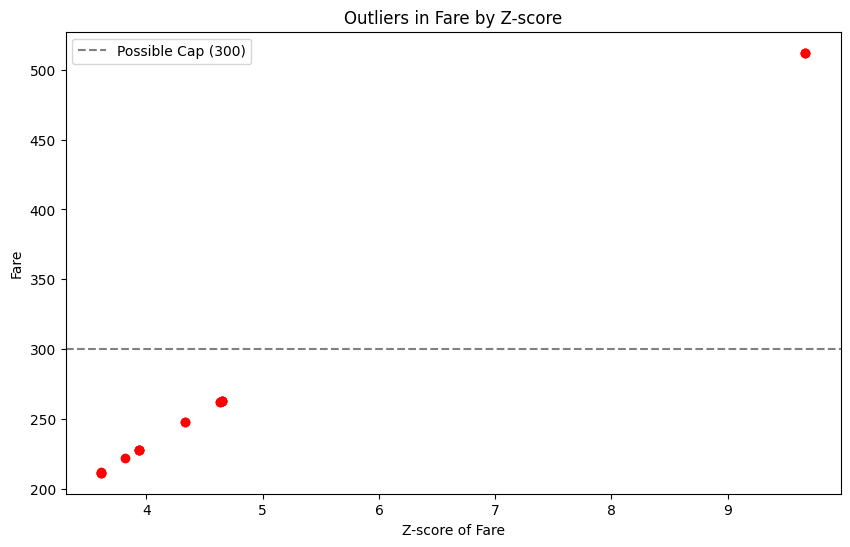

In [67]:
import matplotlib.pyplot as plt

# Scatter plot of Fare vs. Fare_zscore for outliers
plt.figure(figsize=(10, 6))
plt.scatter(sorted_outliers['Fare_zscore'], sorted_outliers['Fare'], color='red')
plt.axhline(y=300, color='gray', linestyle='--', label="Possible Cap (300)")
plt.xlabel("Z-score of Fare")
plt.ylabel("Fare")
plt.title("Outliers in Fare by Z-score")
plt.legend()
plt.show()


In [74]:
print(titanic.columns)  # This will show all column names


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'Deck',
       'Title', 'Fare_log', 'Fare_zscore'],
      dtype='object')


In [75]:
# Cap Fare at 300 and create the Fare_capped column
titanic['Fare_capped'] = titanic['Fare'].apply(lambda x: min(x, 300))


In [77]:
print(titanic.columns)  # Verify that 'Fare_capped' is now in the DataFrame


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'Deck',
       'Title', 'Fare_log', 'Fare_zscore', 'Fare_capped'],
      dtype='object')


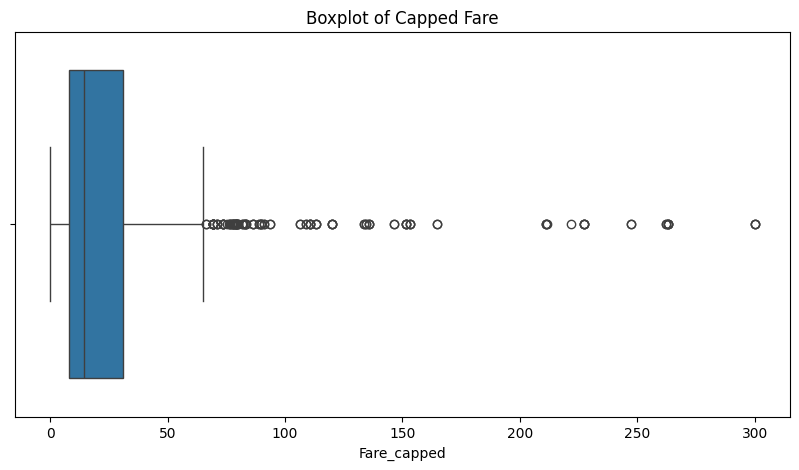

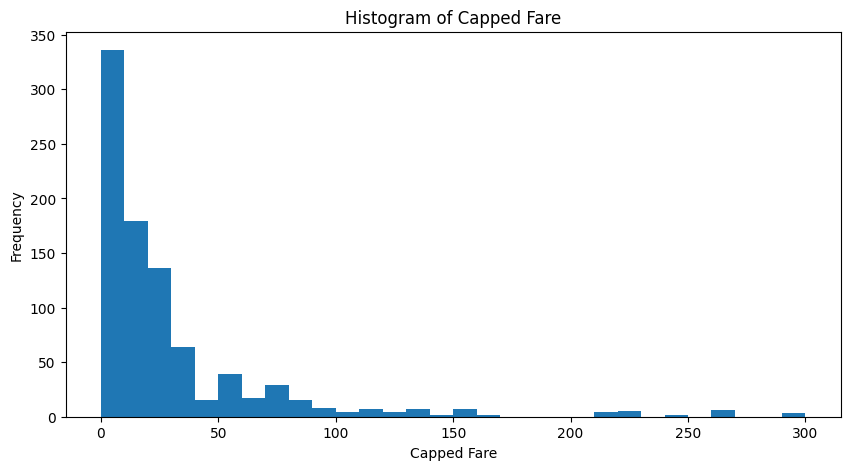

In [78]:
# Boxplot for capped Fare
plt.figure(figsize=(10, 5))
sns.boxplot(data=titanic, x='Fare_capped')
plt.title("Boxplot of Capped Fare")
plt.show()

# Histogram for capped Fare
plt.figure(figsize=(10, 5))
plt.hist(titanic['Fare_capped'], bins=30)
plt.title("Histogram of Capped Fare")
plt.xlabel("Capped Fare")
plt.ylabel("Frequency")
plt.show()


# Training non-linear and ensemble models to see if they improve the Fare prediction

In [79]:
# Set the target variable as capped Fare
y_capped = titanic['Fare_capped']

# Use the relevant features, including Deck and Title
X = titanic[['Age', 'Pclass', 'Embarked', 'FamilySize', 'Deck', 'Title']]


In [80]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train_capped, y_test_capped = train_test_split(X, y_capped, test_size=0.2, random_state=42)


In [81]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train_capped)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test_capped, y_pred_dt)
r2_dt = r2_score(y_test_capped, y_pred_dt)

print("Decision Tree Regressor:")
print("Mean Squared Error (MSE):", mse_dt)
print("R-squared (R²):", r2_dt)


Decision Tree Regressor:
Mean Squared Error (MSE): 1529.903741665546
R-squared (R²): 0.01132579960058655


The Decision Tree Regressor results are indeed disappointing here.

This could be due to a few reasons:

* Overfitting: Decision trees can easily overfit on training data, especially with small or noisy datasets, and may not generalize well to the test data.

* Single Tree Limitation: Unlike ensemble models, a single decision tree doesn't leverage the benefits of combining multiple trees to average out errors and improve stability.

So let's move on to Random Forest and Gradient Boosting, which should handle these issues better by averaging multiple decision trees and capturing complex patterns.



# Gradient Boosting model

In [84]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100)
gb_model.fit(X_train, y_train_capped)

# Predict and evaluate
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test_capped, y_pred_gb)
r2_gb = r2_score(y_test_capped, y_pred_gb)

print("\nGradient Boosting Regressor:")
print("Mean Squared Error (MSE):", mse_gb)
print("R-squared (R²):", r2_gb)



Gradient Boosting Regressor:
Mean Squared Error (MSE): 787.1000139174587
R-squared (R²): 0.4913500400704748


The Gradient Boosting model is performing better than a simple Decision Tree or Linear Regression. However, the R² value suggests that we may still be missing some key features.

*  Possible Next Steps : Hyperparameter Tuning

# Hyperparameter Tuning- GridSearchCV to find best parameter

In [85]:
from sklearn.model_selection import GridSearchCV

# Example parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Grid search for best parameters
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train_capped)

# Display best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best R-squared Score:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best R-squared Score: 0.624164586744325


Best Parameters:

* learning_rate: 0.01 — A lower learning rate helps the model learn more gradually, which often improves accuracy in Gradient Boosting.
* max_depth: 3 — Shallower trees prevent overfitting, which might be beneficial given the complexity of the data.
* n_estimators: 200 — Increasing the number of trees allows the model to learn more patterns, especially with a low learning rate.



# Initialize the optimized Gradient Boosting model with best parameters

In [87]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the optimized Gradient Boosting model with best parameters
best_gb_model = GradientBoostingRegressor(
    learning_rate=0.01,
    max_depth=3,
    n_estimators=200,
    random_state=42
)

# Train the model on the training data
best_gb_model.fit(X_train, y_train_capped)



GradientBoostingRegressor(learning_rate=0.01, n_estimators=200, random_state=42)

In [88]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model on the initial test set if no other data is available
y_pred_test = best_gb_model.predict(X_test)
mse_test = mean_squared_error(y_test_capped, y_pred_test)
r2_test = r2_score(y_test_capped, y_pred_test)

print("Test Set Evaluation:")
print("Mean Squared Error (MSE):", mse_test)
print("R-squared (R²):", r2_test)


Test Set Evaluation:
Mean Squared Error (MSE): 631.912568789479
R-squared (R²): 0.5916372797479856


# Go with Gridsearch since it is better R²




In [89]:
# Get the best model from GridSearchCV
best_gb_model_cv = grid_search.best_estimator_


In [90]:
# Predict and evaluate on the test set
y_pred_cv = best_gb_model_cv.predict(X_test)
mse_cv = mean_squared_error(y_test_capped, y_pred_cv)
r2_cv = r2_score(y_test_capped, y_pred_cv)

print("Test Set Evaluation with GridSearchCV Best Model:")
print("Mean Squared Error (MSE):", mse_cv)
print("R-squared (R²):", r2_cv)


Test Set Evaluation with GridSearchCV Best Model:
Mean Squared Error (MSE): 631.912568789479
R-squared (R²): 0.5916372797479856


Since both the manually tuned Gradient Boosting model and the GridSearchCV-tuned model yield identical results, it confirms that the model has likely reached an optimal performance point with the given parameters.

# Pickel the best model 🫙

In [91]:
import joblib

# Save the GridSearchCV best model as the final model
joblib.dump(best_gb_model_cv, 'final_fare_prediction_model.pkl')
print("Final model saved as final_fare_prediction_model.pkl")


Final model saved as final_fare_prediction_model.pkl
